In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from neural_net import NeuralNetwork
import numpy as np

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images/225.
test_images = test_images/225.

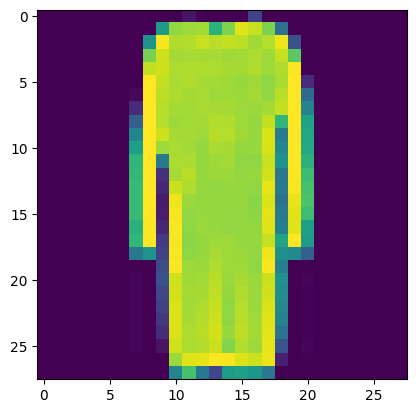

In [7]:
plt.imshow(train_images[25])

In [8]:
train_set_x_flatten =train_images.reshape(train_images.shape[0],-1).T
test_set_x_flatten =test_images.reshape(test_images.shape[0],-1).T

In [9]:
train_set_x_flatten.shape

(784, 60000)

In [10]:
train_labels = train_labels.reshape(1, 60000)
train_labels.shape

(1, 60000)

In [11]:
def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((num_classes, labels.size))
    one_hot[labels, np.arange(labels.size)] = 1
    return one_hot

# Convert train_labels to one-hot encoding
num_classes = 10
train_labels_one_hot = one_hot_encode(train_labels, num_classes)
test_labels_one_hot = one_hot_encode(test_labels, num_classes)

In [12]:
model = NeuralNetwork([784,128,64,10],['relu','tanh','softmax'],epochs=1000,lr=0.1)

In [13]:
model.fit(train_set_x_flatten[:,:1000],train_labels_one_hot[:,:1000])

Cost after iteration 0: 2.3026423679403294
Cost after iteration 200: 1.1867276150847963
Cost after iteration 400: 0.7025104208916537
Cost after iteration 600: 0.5143482680006256
Cost after iteration 800: 0.3696938031987737


[2.3026423679403294,
 1.1867276150847963,
 0.7025104208916537,
 0.5143482680006256,
 0.3696938031987737]

In [14]:
train_accuracy = model.accuracy(test_set_x_flatten[:,1000:1500],test_labels_one_hot[:,1000:1500])
train_accuracy

77.0

In [15]:
model2 = NeuralNetwork([784,128,64,10],['relu','tanh','softmax'],epochs=1000,lr=0.1)

In [16]:
model2.fit_momentum(train_set_x_flatten[:,:1000],train_labels_one_hot[:,:1000])

Cost after epoch 0: 2.301617669367438
Cost after epoch 200: 0.03846987304648479
Cost after epoch 400: 0.0010114795417840885
Cost after epoch 600: 0.0005380929065631528
Cost after epoch 800: 0.0003677162141095433


[2.301617669367438,
 0.03846987304648479,
 0.0010114795417840885,
 0.0005380929065631528,
 0.0003677162141095433]

In [17]:
train_accuracy = model2.accuracy(test_set_x_flatten[:,1000:1500],test_labels_one_hot[:,1000:1500])
train_accuracy

80.60000000000001